## 線形回帰モデルの比較
## (sklearnライブラリ vs 手動)

### ■ 予測関数

線形回帰モデルの予測関数：

$$
f_{\mathbf{w},b}(x) = \mathbf{w} \cdot \mathbf{x} + b
$$

ここで：

- $\mathbf{x}$：入力特徴ベクトル  
- $\mathbf{w}$：重みベクトル  
- $b$：バイアス  

---

### ■ コスト関数（MSE）

損失関数には、平均二乗誤差（MSE）の 1/2 倍を用いる：

$$
J(\mathbf{w}, b) = \frac{1}{2m} \sum_{i=0}^{m-1} \left( f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)} \right)^2
$$

- $m$：データ数  
- $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$：i番目の予測値  
- $y^{(i)}$：i番目の正解値

---

### ■ 勾配（偏微分）

重み $w_j$ およびバイアス $b$ に対する勾配：

$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j} = \frac{1}{m} \sum_{i=0}^{m-1} \left( f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)} \right) x_j^{(i)}
$$

$$
\frac{\partial J(\mathbf{w},b)}{\partial b} = \frac{1}{m} \sum_{i=0}^{m-1} \left( f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)} \right)
$$

---



<>:13: SyntaxWarning: invalid escape sequence '\h'
<>:13: SyntaxWarning: invalid escape sequence '\h'
C:\Users\bsksh\AppData\Local\Temp\ipykernel_21556\2581921865.py:13: SyntaxWarning: invalid escape sequence '\h'
  data = pd.read_csv("data\houses.txt")


number of iterations completed: 106, number of weight updates: 14101.0
プログラムの実行時間: 0.0086 秒


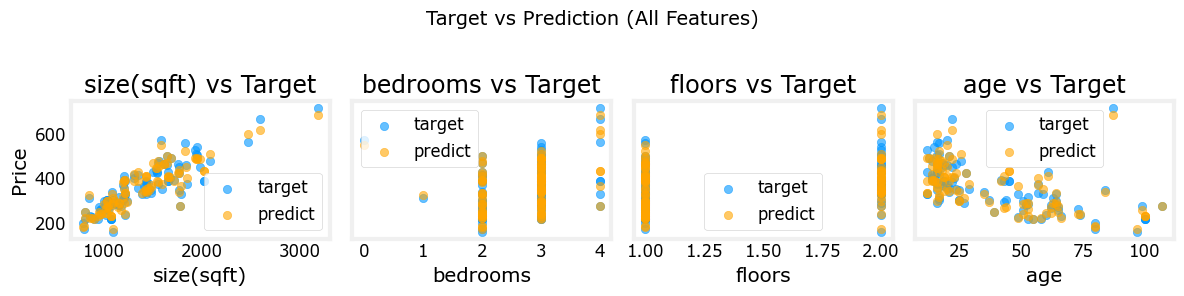

In [9]:
# 1. 必要なライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import time

# 実行前の時刻を取得
start_time = time.time()

#データ読み込みと前処理
data = pd.read_csv("data\houses.txt")
X_train = data.iloc[:, :-1].values  # (n_samples, n_features)最後の列を除いた特徴量
y_train = data.iloc[:, -1].values   # （n_samples,）最後の列をターゲットとして

# 特徴量名とターゲット名を取得
all_columns = data.columns.tolist()
X_features = all_columns[:-1]
y_target = all_columns[-1]

scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train) #求めて(fit)正規化(transform)

#モデルの学習
model = SGDRegressor(max_iter=1000, random_state=42)
model.fit(X_norm, y_train)
print(f"number of iterations completed: {model.n_iter_}, number of weight updates: {sgdr.t_}")
b_norm = model.intercept_
w_norm = model.coef_

#モデル予測
target= model.predict(X_norm)

#sklearn実行時間
end_time = time.time()
execution_time = end_time - start_time
print(f"プログラムの実行時間: {execution_time:.4f} 秒")

#結果出力
n_rows, n_cols = 1, 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3), sharey=True)
axes = np.array(axes).reshape(-1)  # 次元合わせ（1次元でも対応）

for i, ax in enumerate(axes):
    ax.scatter(X_train[:, i], y_train, label='target', alpha=0.6)
    ax.scatter(X_train[:, i], target, color="#FFA500", label='predict', alpha=0.6)
    ax.set_xlabel(X_features[i]) # X軸ラベル設定
    if i == 0: # Y軸ラベルは一番左だけに表示（任意）
        ax.set_ylabel("Price")
    ax.legend()# subplotごとに凡例表示
    ax.set_title(f"{X_features[i]} vs Target")  # subplotのタイトルに変数を含める例

fig.suptitle("Target vs Prediction (All Features)", fontsize=14) # 全体タイトル
plt.tight_layout(rect=[0, 0, 1, 0.95])  # タイトルが被らないよう調整
plt.show()

## ここからは手動プログラム

<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
C:\Users\bsksh\AppData\Local\Temp\ipykernel_21556\1337795467.py:3: SyntaxWarning: invalid escape sequence '\e'
  data = pd.read_csv("data\ex1data1.txt", header=None)


Iteration 0: Cost 31.5236, w=0.0459, b=0.0584
Iteration 150: Cost 5.8034, w=3.5861, b=4.5590
Iteration 300: Cost 4.5420, w=4.3700, b=5.5556
Iteration 450: Cost 4.4802, w=4.5437, b=5.7764
Iteration 600: Cost 4.4771, w=4.5821, b=5.8252
Iteration 750: Cost 4.4770, w=4.5906, b=5.8361
Iteration 900: Cost 4.4770, w=4.5925, b=5.8385
Iteration 1050: Cost 4.4770, w=4.5929, b=5.8390
Iteration 1200: Cost 4.4770, w=4.5930, b=5.8391
Iteration 1350: Cost 4.4770, w=4.5930, b=5.8391
プログラムの実行時間: 0.0441 秒


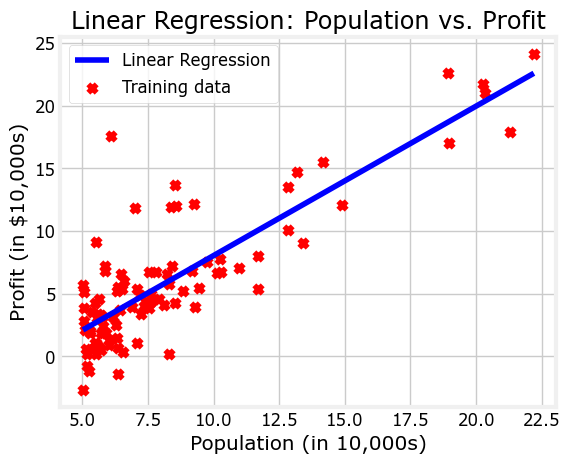

In [ ]:
start_time = time.time()

data = pd.read_csv("data\ex1data1.txt", header=None)

X_train = data.iloc[:, :-1].values.flatten()  #2D → 1D
y_train = data.iloc[:, -1].values 

# 特徴量の標準化
X_mean = np.mean(X_train)
X_std = np.std(X_train)
X_norm = (X_train - X_mean) / X_std

# ハイパーパラメータの設定
alpha = 0.01       # 学習率
iterations = 1500  # 繰り返し回数

# パラメータの初期化
w = 0.0
b = 0.0
m = len(X_norm)  # データ数

# コスト関数
def compute_cost(X, y, w, b):
    predictions = w * X + b
    cost = (1 / (2 * len(X))) * np.sum((predictions - y) ** 2)
    return cost

# 勾配計算関数
def compute_gradient(X, y, w, b):
    m = len(X)
    predictions = w * X + b
    errors = predictions - y
    dj_dw = (1 / m) * np.sum(errors * X)
    dj_db = (1 / m) * np.sum(errors)
    return dj_dw, dj_db

# 勾配降下法
for i in range(iterations):
    dj_dw, dj_db = compute_gradient(X_norm, y_train, w, b)
    w -= alpha * dj_dw
    b -= alpha * dj_db
    
    # 10回に1回コスト出力
    if i % (iterations // 10) == 0:
        cost = compute_cost(X_norm, y_train, w, b)
        print(f"Iteration {i}: Cost {cost:.4f}, w={w:.4f}, b={b:.4f}")

#予測
x_range = np.linspace(min(X_norm), max(X_norm), 100)
y_pred = w * x_range + b

#手動実行時間
end_time = time.time()
execution_time = end_time - start_time
print(f"プログラムの実行時間: {execution_time:.4f} 秒")

#回帰直線と元データの描画
plt.plot(x_range * X_std + X_mean, y_pred, label="Linear Regression", color='blue')  # 元のスケールに戻す
plt.scatter(X_train, y_train, color='red', marker='x', label="Training data")
plt.title("Linear Regression: Population vs. Profit")
plt.xlabel("Population (in 10,000s)")
plt.ylabel("Profit (in $10,000s)")
plt.legend()
plt.grid(True)
plt.show()

